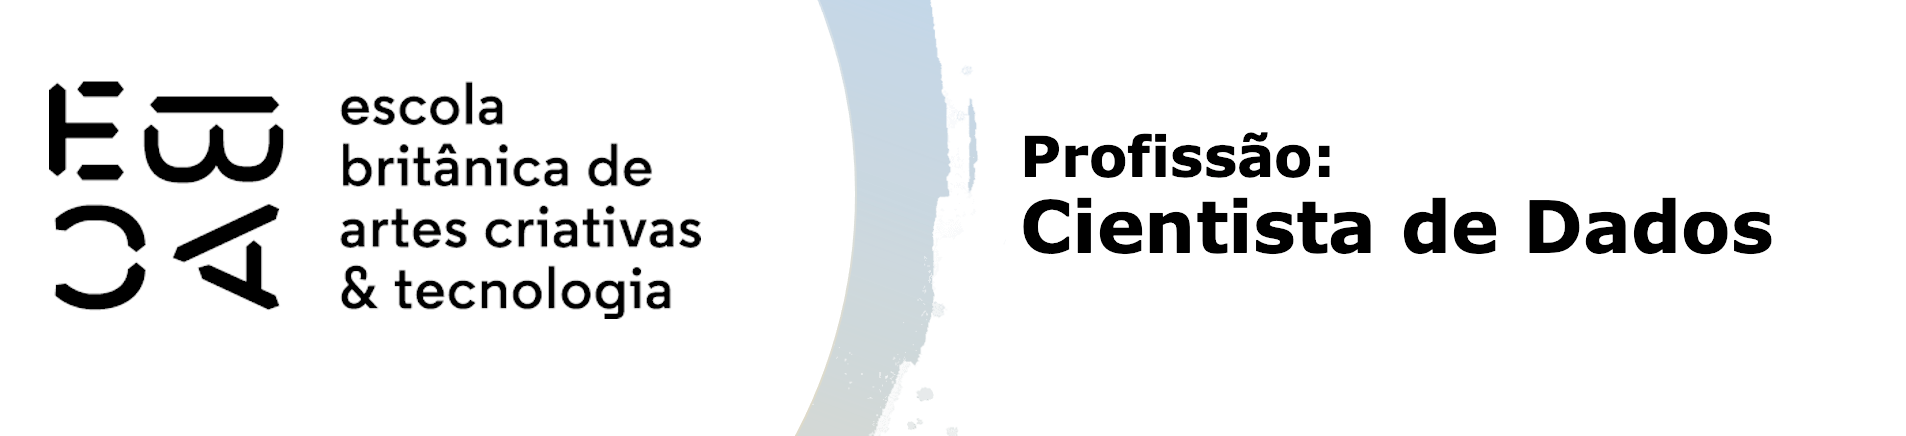

# Métodos hierárquicos de agrupamento - Tarefa

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [34]:
peng = sns.load_dataset('penguins')
peng.index.name='id'
peng_num = peng.select_dtypes(include='number').dropna()

padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

clus.fit(peng_pad)

peng_num['grupo'] = clus.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


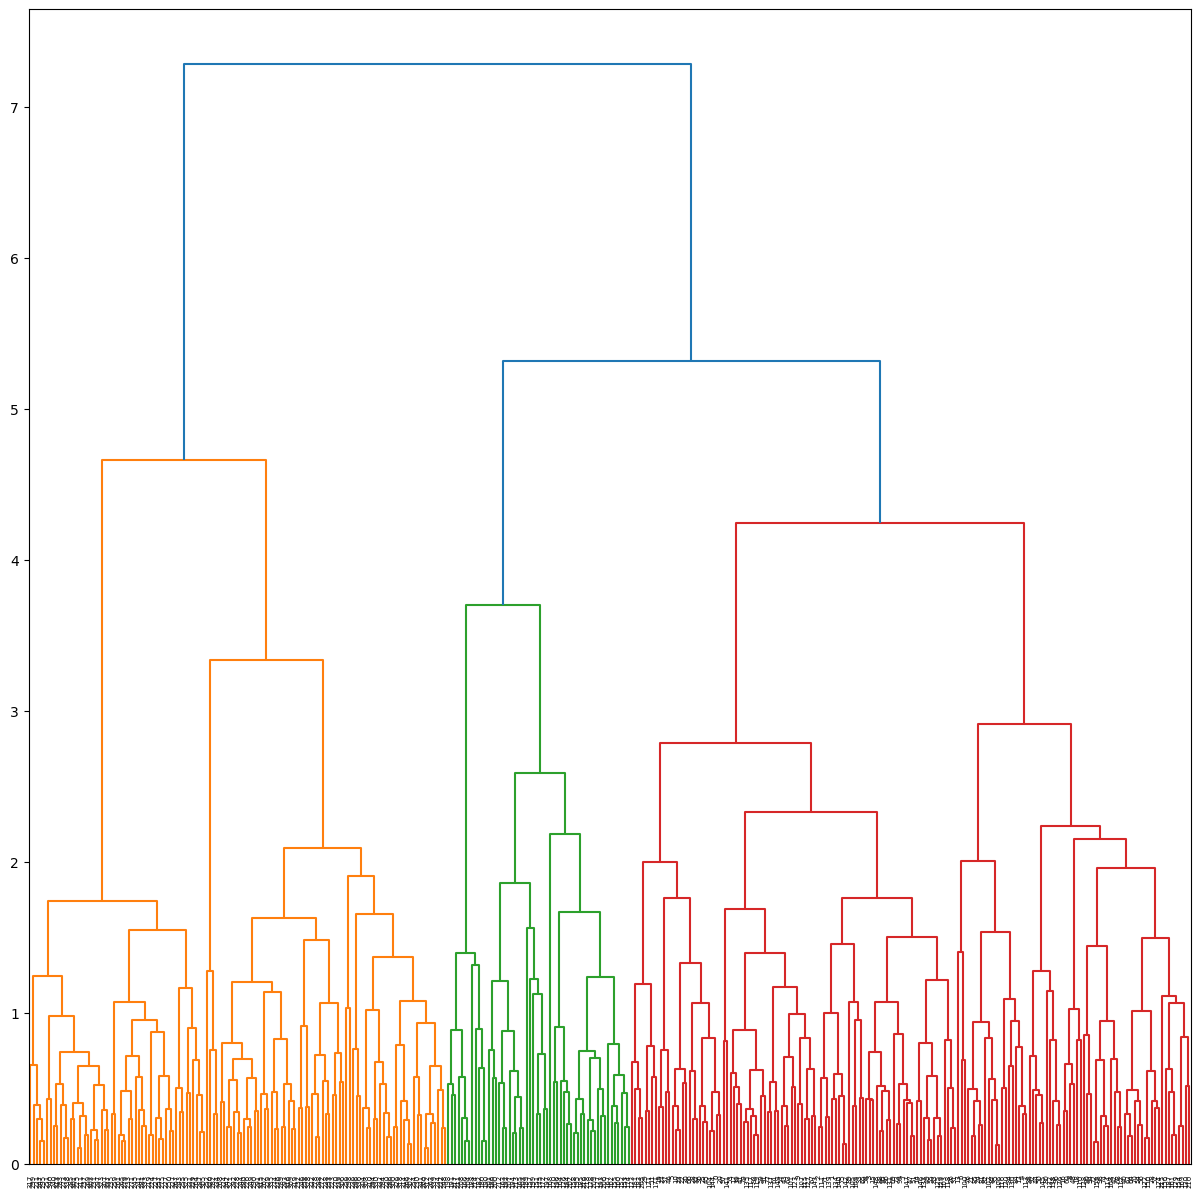

In [35]:
plt.figure(figsize=(15, 15))

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [36]:
# Adicionando a coluna species ao dataframe com os grupos
peng_num['species'] = peng.loc[peng_num.index, 'species']

# Contagem de espécies por grupo
espécies_por_grupo = pd.crosstab(peng_num['grupo'], peng_num['species'])
print(espécies_por_grupo)

species  Adelie  Chinstrap  Gentoo
grupo                             
0             0          0     123
1           151         14       0
2             0         54       0


In [37]:
def perfil_clusters(df, nome):
    # Seleciona apenas as colunas numéricas (exclui strings como 'species')
    df_numerico = df.select_dtypes(include='number')
    
    # Calcula estatísticas descritivas por grupo
    perfil = df_numerico.groupby('grupo').agg(['mean', 'std']).T  # Transpor para melhor visualização

    # Criar DataFrame separado para o tamanho do grupo
    tamanho_grupo = df_numerico['grupo'].value_counts().sort_index().rename("Tamanho do Grupo").to_frame().T

    print(f"\nPerfil dos Grupos ({nome}):\n")
    display(tamanho_grupo)
    display(perfil)
perfil_clusters(peng_num, "Grupos de Pinguins")


Perfil dos Grupos (Grupos de Pinguins):



grupo,0,1,2
Tamanho do Grupo,123,165,54


grupo                             0            1            2
bill_length_mm    mean    47.504878    39.283030    49.935185
                  std      3.081857     3.072471     2.659916
bill_depth_mm     mean    14.982114    18.304242    18.568519
                  std      0.981220     1.197831     1.153473
flipper_length_mm mean   217.186992   190.048485   197.055556
                  std      6.484976     6.448488     7.032047
body_mass_g       mean  5076.016260  3688.181818  3779.629630
                  std    504.116237   449.767586   387.848263

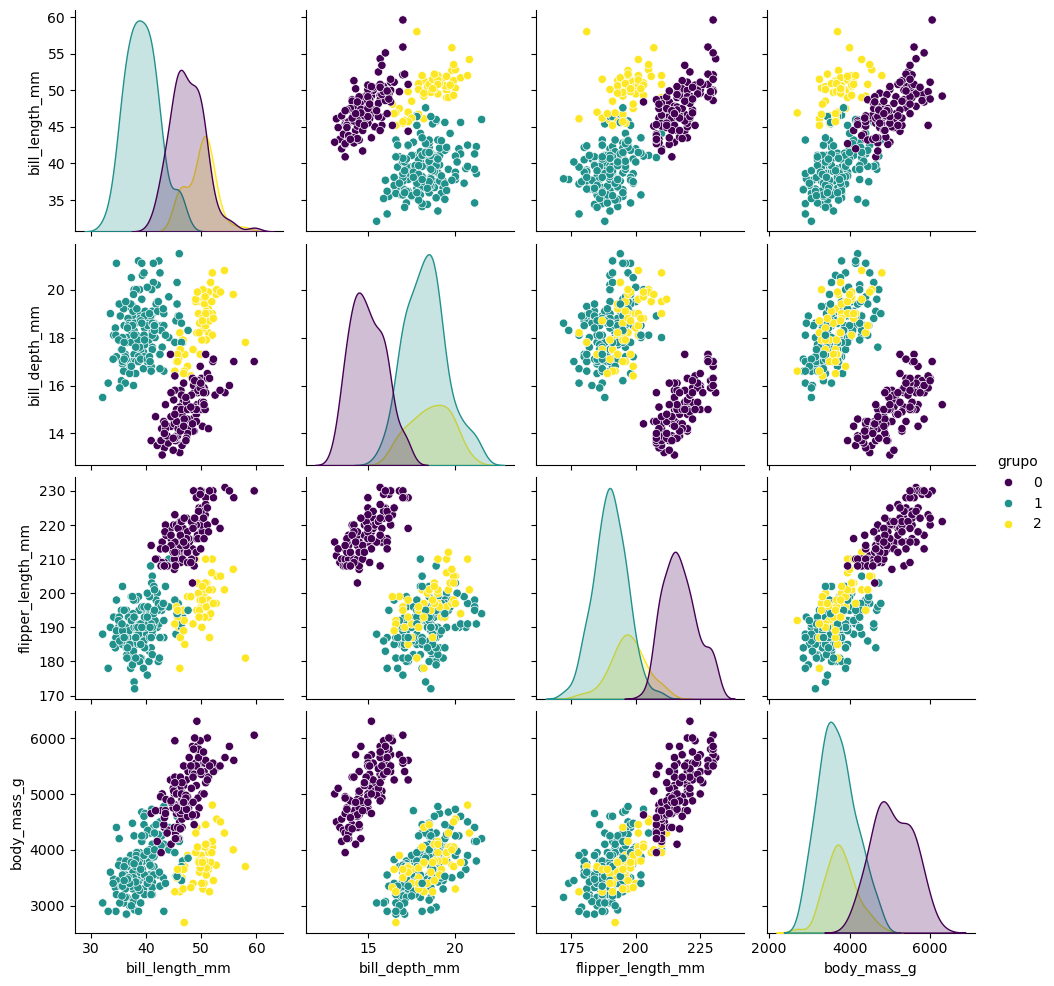

In [38]:
sns.pairplot(data=peng_num, hue='grupo',palette="viridis")


## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

#### Testando para 4 grupos

In [39]:
clus_4 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=4)

clus_4.fit(peng_pad)

peng_num['grupo_2'] = clus_4.labels_
peng_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo,species,grupo_2
id,,,,,,,
0,39.1,18.7,181.0,3750.0,1,Adelie,0
1,39.5,17.4,186.0,3800.0,1,Adelie,0
2,40.3,18.0,195.0,3250.0,1,Adelie,0
4,36.7,19.3,193.0,3450.0,1,Adelie,0
5,39.3,20.6,190.0,3650.0,1,Adelie,0


In [56]:
# Adicionando a coluna sexo ao dataframe com os grupos
peng_num['sex'] = peng.loc[peng_num.index, 'sex']

# Contagem de espécies por grupo
print("Espécie por grupo:")
display(pd.crosstab(peng_num['grupo_2'], peng_num['species']))

print("Espécie e sexo por grupo:")
display(pd.crosstab(peng_num['grupo_2'], [peng_num['species'], peng_num['sex']]))

display(
    pd.crosstab(peng_num['grupo_2'], [peng_num['species'], peng_num['sex']],normalize='index')
    .multiply(100)
    .round(1)
    .astype(str) + '%'
)

Espécie por grupo:


species,Adelie,Chinstrap,Gentoo
grupo_2,,,
0,151,14,0
1,0,0,71
2,0,54,0
3,0,0,52


Espécie e sexo por grupo:


species Adelie      Chinstrap      Gentoo     
sex     Female Male    Female Male Female Male
grupo_2                                       
0           73   73        14    0      0    0
1            0    0         0    0      9   61
2            0    0        20   34      0    0
3            0    0         0    0     49    0

species Adelie        Chinstrap         Gentoo       
sex     Female   Male    Female   Male  Female   Male
grupo_2                                              
0        45.6%  45.6%      8.8%   0.0%    0.0%   0.0%
1         0.0%   0.0%      0.0%   0.0%   12.9%  87.1%
2         0.0%   0.0%     37.0%  63.0%    0.0%   0.0%
3         0.0%   0.0%      0.0%   0.0%  100.0%   0.0%

In [55]:
# Percentuais por linha (grupo)
print("\nPercentual de espécies por grupo - Primeira Clusterização:")
display(
    pd.crosstab(peng_num['grupo'], peng_num['species'], normalize='index')
    .multiply(100)
    .round(1)
    .astype(str) + '%'
)

print("\nPercentual de espécies por grupo - Segunda Clusterização:")
display(
    pd.crosstab(peng_num['grupo_2'], peng_num['species'], normalize='index')
    .multiply(100)
    .round(1)
    .astype(str) + '%'
)



Percentual de espécies por grupo - Primeira Clusterização:


species,Adelie,Chinstrap,Gentoo
grupo,,,
0,0.0%,0.0%,100.0%
1,91.5%,8.5%,0.0%
2,0.0%,100.0%,0.0%



Percentual de espécies por grupo - Segunda Clusterização:


species,Adelie,Chinstrap,Gentoo
grupo_2,,,
0,91.5%,8.5%,0.0%
1,0.0%,0.0%,100.0%
2,0.0%,100.0%,0.0%
3,0.0%,0.0%,100.0%


#### Conclusão

Como podemos perceber no percentual de cada espécie alocado em cada grupo, vemos que a clusterização divindo a base em 3 grupos foi mais eficiente. O grupo extra adicional somente dividiu os pinguins da espécie 'Gentoo' em 2, onde basicamente ficou dividido entre os machos (87%) e fêmeas (13%) em um dos grupos, enquanto outro ficou com o restante das fêmeas.

Apesar de não ter testado mais agrupamentos, a separação em mais grupos provavelmente buscaria fazer essa distinção entre machos e fêmeas da mesma espécie. E aí, dependendo da análise a ser feita, pode ser um caminho interessante para quem busca agrupamentos mais detalhados.

